# TRAIN MODEL CƠ BẢN 

**Bài này em làm hết sức cơ bản do trên trường bọn e đang phải thi với rất nhiều bài tập lớn nên không có thời gian làm chỉn chu như lần trước**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pathlib import Path

In [8]:
customer_df = pd.read_excel(Path("../../data/Customer.xlsx"))

In [12]:
customer_df.head()

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12


In [16]:
person_df = pd.read_excel(Path("../../data/Person.xlsx"))

In [ ]:
person_df.head()
# Bảng này lấy ra PersonType

,BusinessEntityID,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics,rowguid,ModifiedDate
0,1,EM,0,NaN,Ken,J,Sánchez,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",92C4279F-1207-48A3-8448-4636514EB7E2,2009-01-07
1,2,EM,0,NaN,Terri,Lee,Duffy,NaN,1,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",D8763459-8AA8-47CC-AFF7-C9079AF79033,2008-01-24
2,3,EM,0,NaN,Roberto,NaN,Tamburello,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",E1A2555E-0828-434B-A33B-6F38136A37DE,2007-11-04
3,4,EM,0,NaN,Rob,NaN,Walters,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",F2D7CE06-38B3-4357-805B-F4B6B71C01FF,2007-11-28
4,5,EM,0,Ms.,Gail,A,Erickson,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",F3A3F6B4-AE3B-430C-A754-9F2231BA6FEF,2007-12-30


In [14]:
order_detail_df = pd.read_excel(Path("../../data/OrderDetail.xlsx"))

In [ ]:
order_detail_df.head()
# Ở bảng này tôi chọn ra biến OrderQty

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,2019-07-13,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,2011-05-31
1,2019-07-13,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,2011-05-31
2,2019-07-13,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,2011-05-31
3,2019-07-13,4,4911-403C-98,1,771,1,2039.994,0.0,2039.994,04C4DE91-5815-45D6-8670-F462719FBCE3,2011-05-31
4,2019-07-13,5,4911-403C-98,1,772,1,2039.994,0.0,2039.994,5A74C7D2-E641-438E-A7AC-37BF23280301,2011-05-31


In [18]:
product_df = pd.read_excel(Path("../../data/Product.xlsx"))

In [20]:
product_df.head()
# Bảng này tôi lấy ra: Name, ProductLine, Class, Style

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08
3,4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B,2014-02-08
4,316,Blade,BL-2036,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,E73E9750-603B-4131-89F5-3DD15ED5FF80,2014-02-08


In [23]:
territory_df = pd.read_excel(Path("../../data/Territory.xlsx"))

In [25]:
territory_df.head()
# Bảng này lấy ra: Name, CountryRegionCode, Group

,TerritoryID,Name,CountryRegionCode,Group,SalesYTD,SalesLastYear,CostYTD,CostLastYear,rowguid,ModifiedDate
0,1,Northwest,US,North America,7.887187e+06,3298694.494,0,0,43689A10-E30B-497F-B0DE-11DE20267FF7,2008-04-30
1,2,Northeast,US,North America,2.402177e+06,3607148.937,0,0,00FB7309-96CC-49E2-8363-0A1BA72486F2,2008-04-30
2,3,Central,US,North America,3.072175e+06,3205014.077,0,0,DF6E7FD8-1A8D-468C-B103-ED8ADDB452C1,2008-04-30
3,4,Southwest,US,North America,1.051085e+07,5366575.710,0,0,DC3E9EA0-7950-4431-9428-99DBCBC33865,2008-04-30
4,5,Southeast,US,North America,2.538667e+06,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30


In [26]:
order_header_df = pd.read_excel(Path("../../data/OrderHeader.xlsx"))

In [28]:
order_header_df.head()
# Bảng này lấy ra TotalDue, OrderDate

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,2019-07-13,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43659,PO522145787,10-4020-000676,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,NaN,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,2019-07-14,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43660,PO18850127500,10-4020-000117,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,NaN,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,2019-07-15,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43661,PO18473189620,10-4020-000442,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,NaN,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07
3,2019-07-16,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43662,PO18444174044,10-4020-000227,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,NaN,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07
4,2019-07-17,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43663,PO18009186470,10-4020-000510,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,NaN,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07


In [31]:
full_df = pd.merge(order_detail_df, order_header_df, on="SalesOrderID", how="left", suffixes=("_detail", "_header"))
full_df = pd.merge(full_df, customer_df, on="CustomerID", how="left", suffixes=("", "_customer"))
full_df = pd.merge(full_df, person_df, left_on="PersonID", right_on="BusinessEntityID", how="left", suffixes=("", "_person"))
full_df = pd.merge(full_df, product_df, on="ProductID", how="left", suffixes=("", "_product"))
full_df = pd.merge(full_df, territory_df, on="TerritoryID", how="left", suffixes=("", "_territory"))
full_df.head()


,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid_detail,...,ModifiedDate_product,Name_territory,CountryRegionCode,Group,SalesYTD,SalesLastYear,CostYTD,CostLastYear,rowguid_territory,ModifiedDate_territory
0,2019-07-13,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,...,2014-02-08,Southeast,US,North America,2538667.252,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30
1,2019-07-13,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,...,2014-02-08,Southeast,US,North America,2538667.252,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30
2,2019-07-13,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,...,2014-02-08,Southeast,US,North America,2538667.252,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30
3,2019-07-13,4,4911-403C-98,1,771,1,2039.994,0.0,2039.994,04C4DE91-5815-45D6-8670-F462719FBCE3,...,2014-02-08,Southeast,US,North America,2538667.252,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30
4,2019-07-13,5,4911-403C-98,1,772,1,2039.994,0.0,2039.994,5A74C7D2-E641-438E-A7AC-37BF23280301,...,2014-02-08,Southeast,US,North America,2538667.252,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30


In [32]:
full_df.columns

Index(['SalesOrderID', 'SalesOrderDetailID', 'CarrierTrackingNumber',
       'OrderQty', 'ProductID', 'SpecialOfferID', 'UnitPrice',
       'UnitPriceDiscount', 'LineTotal', 'rowguid_detail',
       'ModifiedDate_detail', 'RevisionNumber', 'OrderDate', 'DueDate',
       'ShipDate', 'Status', 'OnlineOrderFlag', 'SalesOrderNumber',
       'PurchaseOrderNumber', 'AccountNumber', 'CustomerID', 'SalesPersonID',
       'TerritoryID', 'BillToAddressID', 'ShipToAddressID', 'ShipMethodID',
       'CreditCardID', 'CreditCardApprovalCode', 'CurrencyRateID', 'SubTotal',
       'TaxAmt', 'Freight', 'TotalDue', 'Comment', 'rowguid_header',
       'ModifiedDate_header', 'PersonID', 'StoreID', 'TerritoryID_customer',
       'AccountNumber_customer', 'rowguid', 'ModifiedDate', 'BusinessEntityID',
       'PersonType', 'NameStyle', 'Title', 'FirstName', 'MiddleName',
       'LastName', 'Suffix', 'EmailPromotion', 'AdditionalContactInfo',
       'Demographics', 'rowguid_person', 'ModifiedDate_person', 'Na

In [33]:
full_df_copy = full_df.copy()

In [34]:
full_df_copy = full_df_copy[[
    "PersonType",
    "OrderQty",
    "Name", 
    "ProductLine", 
    "Class", 
    "Style",
    "Name_territory",
    "CountryRegionCode", 
    "Group",
    "TotalDue",
    "OrderDate"
]]

In [35]:
full_df_copy.head()

,PersonType,OrderQty,Name,ProductLine,Class,Style,Name_territory,CountryRegionCode,Group,TotalDue,OrderDate
0,SC,1,"Mountain-100 Black, 42",M,H,U,Southeast,US,North America,23153.2339,2011-05-31
1,SC,3,"Mountain-100 Black, 44",M,H,U,Southeast,US,North America,23153.2339,2011-05-31
2,SC,1,"Mountain-100 Black, 48",M,H,U,Southeast,US,North America,23153.2339,2011-05-31
3,SC,1,"Mountain-100 Silver, 38",M,H,U,Southeast,US,North America,23153.2339,2011-05-31
4,SC,1,"Mountain-100 Silver, 42",M,H,U,Southeast,US,North America,23153.2339,2011-05-31


In [37]:
full_df_copy.drop_duplicates(inplace=True)

In [39]:
full_df_copy.isna().sum()/len(full_df_copy)

PersonType           0.000000
OrderQty             0.000000
Name                 0.000000
ProductLine          0.018996
Class                0.472944
Style                0.404663
Name_territory       0.000000
CountryRegionCode    0.000000
Group                0.000000
TotalDue             0.000000
OrderDate            0.000000
dtype: float64

-> Bỏ cột class với Style vì thiếu gần nửa lận

In [40]:
full_df_copy = full_df_copy.drop(columns=["Class", "Style"])

In [44]:
full_df_copy[["Name","ProductLine"]][full_df_copy["ProductLine"].isna()]

,Name,ProductLine
10772,HL Headset,NaN
10781,ML Headset,NaN
10793,LL Fork,NaN
10794,LL Headset,NaN
10798,HL Fork,NaN
...,...,...
113535,Front Brakes,NaN
113549,Chain,NaN
113550,HL Crankset,NaN
113551,Front Derailleur,NaN


In [45]:
# Thay null cột ProductLine bằng "Unidentified"
full_df_copy["ProductLine"] = full_df_copy["ProductLine"].fillna("Unidentified")

In [47]:
# Kiểm tra các cột có giá trị null được coi là chuỗi rỗng ""
for col in full_df_copy.columns:
    empty_string_count = (full_df_copy[col] == "").sum()
    if empty_string_count > 0:
        print(f"{col}: {empty_string_count} giá trị rỗng ('')")

In [48]:
full_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120342 entries, 0 to 121316
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PersonType         120342 non-null  object        
 1   OrderQty           120342 non-null  int64         
 2   Name               120342 non-null  object        
 3   ProductLine        120342 non-null  object        
 4   Name_territory     120342 non-null  object        
 5   CountryRegionCode  120342 non-null  object        
 6   Group              120342 non-null  object        
 7   TotalDue           120342 non-null  float64       
 8   OrderDate          120342 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 9.2+ MB


### Xem qua "độ đa dạng trong dữ liệu của các cột"

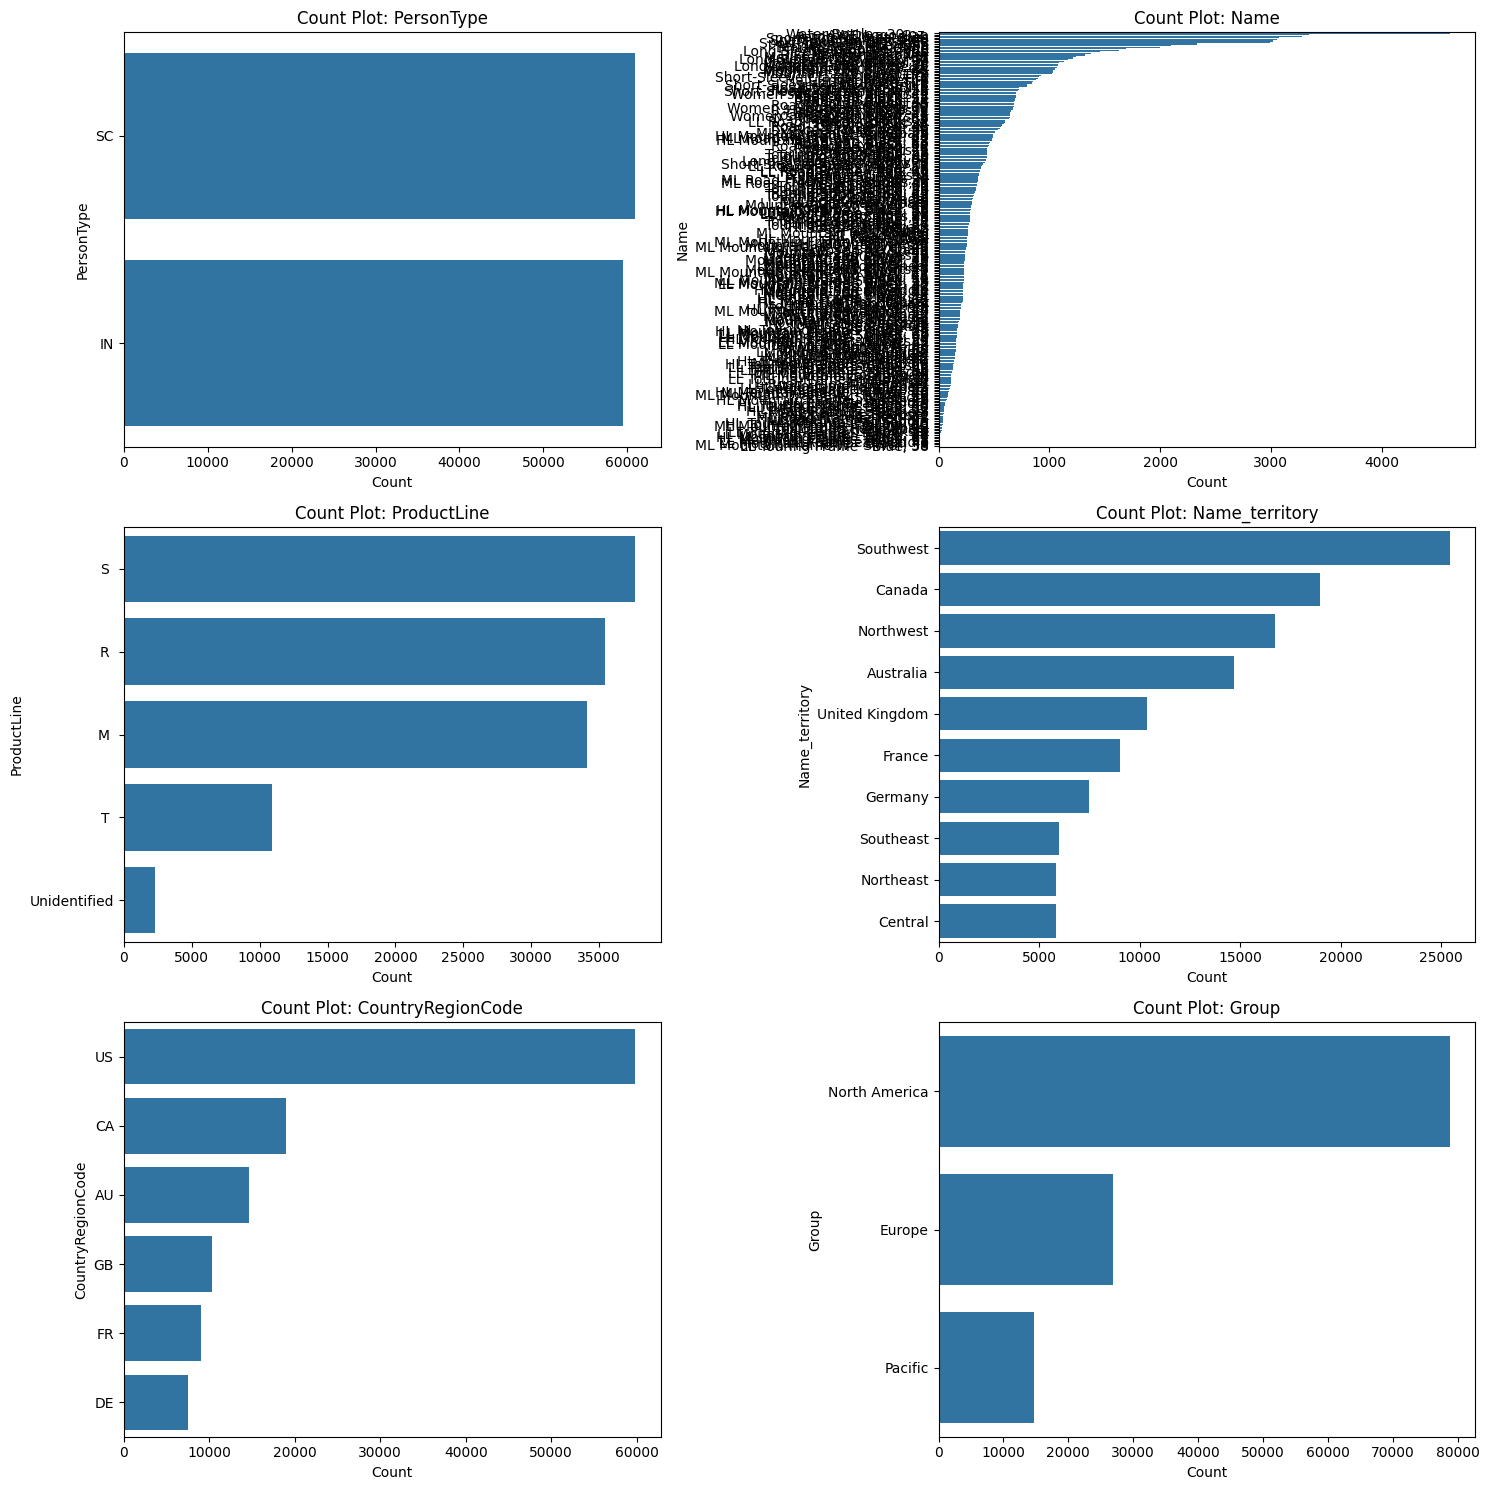

In [ ]:
# Lấy danh sách các cột object
object_columns = full_df_copy.select_dtypes(include='object').columns

# Tạo figure với subplots
n_cols = 2
n_rows = (len(object_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

# Vẽ count plot cho từng cột
for idx, col in enumerate(object_columns):
    sns.countplot(data=full_df_copy, y=col, ax=axes[idx], order=full_df_copy[col].value_counts().index)
    axes[idx].set_title(f'Count Plot: {col}')
    axes[idx].set_xlabel('Count')
    
# Ẩn các subplot thừa
for idx in range(len(object_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


### Feature Engineering

#### 1. Feature Extraction

In [50]:
full_df_copy["OrderDate"] = pd.to_datetime(full_df_copy["OrderDate"])
full_df_copy["Year"] = full_df_copy["OrderDate"].dt.year
full_df_copy["Month"] = full_df_copy["OrderDate"].dt.month
full_df_copy["Day"] = full_df_copy["OrderDate"].dt.day

In [51]:
full_df_copy.drop(columns=["OrderDate"], inplace=True)

In [52]:
full_df_copy.head()

,PersonType,OrderQty,Name,ProductLine,Name_territory,CountryRegionCode,Group,TotalDue,Year,Month,Day
0,SC,1,"Mountain-100 Black, 42",M,Southeast,US,North America,23153.2339,2011,5,31
1,SC,3,"Mountain-100 Black, 44",M,Southeast,US,North America,23153.2339,2011,5,31
2,SC,1,"Mountain-100 Black, 48",M,Southeast,US,North America,23153.2339,2011,5,31
3,SC,1,"Mountain-100 Silver, 38",M,Southeast,US,North America,23153.2339,2011,5,31
4,SC,1,"Mountain-100 Silver, 42",M,Southeast,US,North America,23153.2339,2011,5,31


#### 2. Feature Transformation

Chia train, test

In [54]:
train_df, test_df = train_test_split(full_df_copy, test_size=0.2, random_state=42)

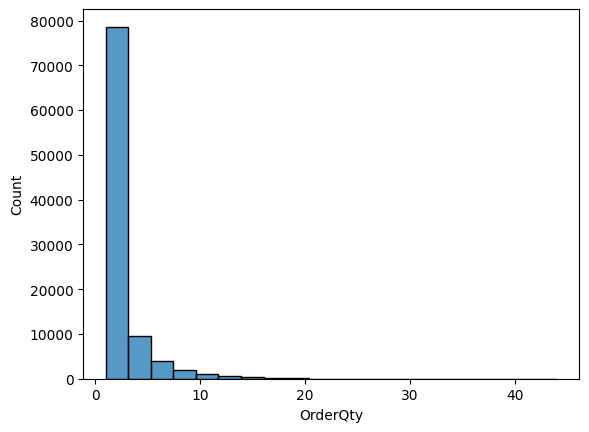

In [55]:
# Xem phân phối dữ liệu của OrderQty
sns.histplot(train_df["OrderQty"], bins=20)
plt.show()

In [ ]:
# Apply Box-Cox transformation to OrderQty
train_df["OrderQty_boxcox"], fitted_lambda = boxcox(train_df["OrderQty"])

# Apply the same transformation to test set using the fitted lambda
test_df["OrderQty_boxcox"] = boxcox(test_df["OrderQty"], lmbda=fitted_lambda)

print(f"Fitted lambda: {fitted_lambda}")


Fitted lambda: -1.3184272167778086


In [ ]:
train_df.drop(columns=["OrderQty"], inplace=True)
test_df.drop(columns=["OrderQty"], inplace=True)

,PersonType,Name,ProductLine,Name_territory,CountryRegionCode,Group,TotalDue,Year,Month,Day,OrderQty_boxcox
106687,IN,"Sport-100 Helmet, Blue",S,Australia,AU,Pacific,1276.8054,2014,4,8,0.000000
81610,IN,ML Mountain Tire,M,Canada,CA,North America,33.1390,2013,12,30,0.000000
76441,SC,"Touring-1000 Blue, 54",T,Northeast,US,North America,26747.2961,2013,11,30,0.454351
104596,SC,"Touring-1000 Blue, 50",T,France,FR,Europe,122916.4563,2014,3,31,0.580285
347,SC,"Mountain-100 Black, 44",M,Southeast,US,North America,44344.8265,2011,5,31,0.667613


#### 3. Feature Encoding

OHE cho các cột PersonType, ProductLine, Name_territory, CountryRegionCode, Group

In [ ]:

ohe_cols = ["PersonType", "ProductLine", "Name_territory", "CountryRegionCode", "Group"]

# Tạo encoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit encoder trên tập huấn luyện
ohe.fit(train_df[ohe_cols])

# Transform cả tập huấn luyện và tập kiểm tra
train_encoded_array = ohe.transform(train_df[ohe_cols])
test_encoded_array = ohe.transform(test_df[ohe_cols])

# Lấy tên cột từ encoder
encoded_columns = ohe.get_feature_names_out(input_features=ohe_cols)

# Tạo DataFrame từ kết quả encoded với tên cột phù hợp
train_encoded_df = pd.DataFrame(
    train_encoded_array,
    columns=encoded_columns,
    index=train_df.index  
)

test_encoded_df = pd.DataFrame(
    test_encoded_array,
    columns=encoded_columns,
    index=test_df.index 
)

# Kết hợp với DataFrame gốc
train_df = pd.concat([train_df.drop(columns=ohe_cols), train_encoded_df], axis=1)
test_df = pd.concat([test_df.drop(columns=ohe_cols), test_encoded_df], axis=1)


Shape of train_encoded_df: (96273, 26)
Shape of test_encoded_df: (24069, 26)
Number of encoded columns: 26


Target encoding cho cột Name dựa trên mean cột TotalDue

In [77]:
product_target_mean = train_df.groupby('Name')['TotalDue'].mean()
train_df['Name_target_encoded'] = train_df['Name'].map(product_target_mean)
test_df['Name_target_encoded'] = test_df['Name'].map(product_target_mean)

# Xử lý các tên sản phẩm chưa thấy trong tập huấn luyện
overall_mean = train_df['TotalDue'].mean()
test_df['Name_target_encoded'].fillna(overall_mean, inplace=True)
train_df['Name_target_encoded'].fillna(overall_mean, inplace=True)


In [ ]:
train_df.drop(columns=["Name"], inplace=True)
test_df.drop(columns=["Name"], inplace=True)


### Huấn luyện mô hình